In [2]:
import pandas as pd
import nltk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

Cluster reviews to determine hotel type
add as feature

In [3]:
data = pd.read_csv('C:\\Users\\Travis Park\\Downloads\\Review_Texts\\merged_reviews.csv', encoding = 'latin1')

**Client Metrics**

In [4]:
agg = pd.pivot_table(data, values=['overall','value','rooms','location','cleanliness','check_in','service','business_service'], index='author', aggfunc=np.mean)

In [5]:
agg.head()

,business_service,check_in,cleanliness,location,overall,rooms,service,value
author,,,,,,,,
!!,NaN,NaN,5.0,NaN,5.000000,5.0,5.0,4.5
!!!!!!?,5.0,5.0,5.0,2.0,4.000000,5.0,5.0,5.0
!_1234,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
#NAME?,5.0,5.0,5.0,5.0,4.666667,5.0,5.0,5.0
$savemoney$,NaN,NaN,4.0,NaN,4.000000,5.0,4.0,4.0


In [6]:
agg = agg.fillna(-1)

In [7]:
agg = agg.round(1)
X = agg.ix[:,1:]

In [8]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(X)

In [9]:
y = kmeans.labels_

agg['cluster'] = y

In [10]:
agg.head()

,business_service,check_in,cleanliness,location,overall,rooms,service,value,cluster
author,,,,,,,,,
!!,-1.0,-1.0,5.0,-1.0,5.0,5.0,5.0,4.5,5
!!!!!!?,5.0,5.0,5.0,2.0,4.0,5.0,5.0,5.0,4
!_1234,-1.0,-1.0,-1.0,-1.0,2.0,-1.0,-1.0,-1.0,1
#NAME?,5.0,5.0,5.0,5.0,4.7,5.0,5.0,5.0,4
$savemoney$,-1.0,-1.0,4.0,-1.0,4.0,5.0,4.0,4.0,5


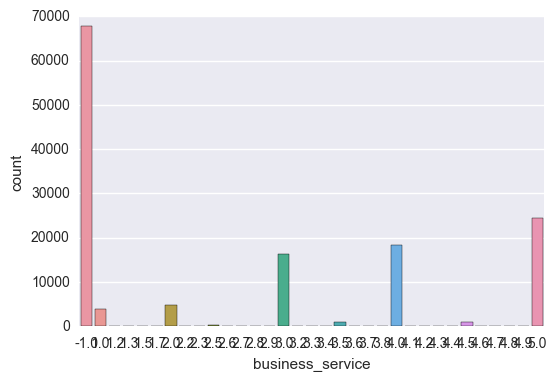

In [11]:
sns.countplot(x = 'business_service',data = agg)

In [12]:
agg = agg.reset_index()

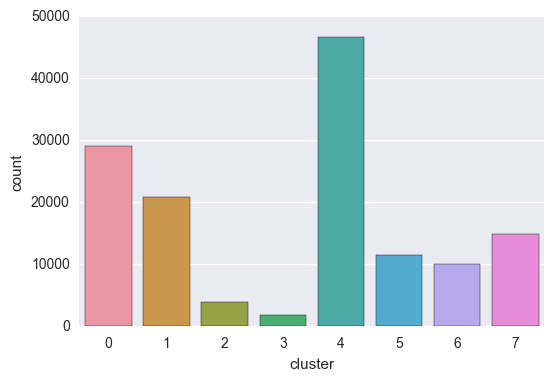

In [13]:
sns.countplot(x="cluster", data=agg)

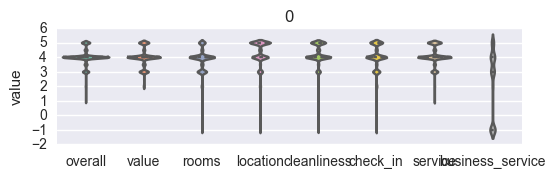

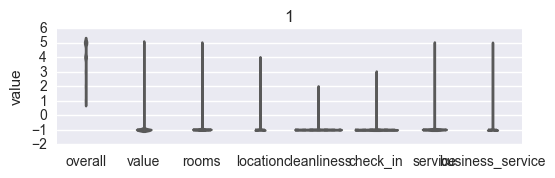

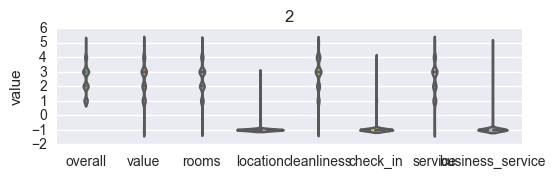

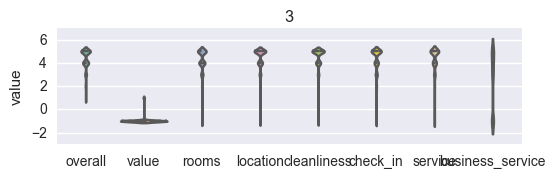

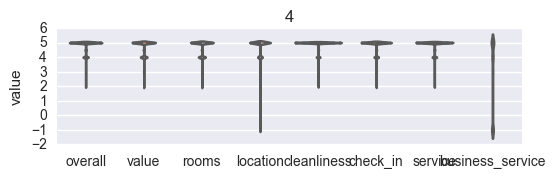

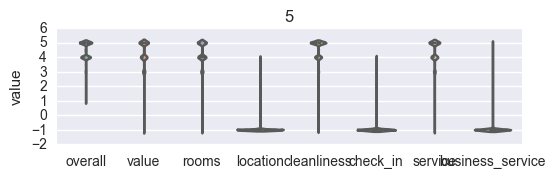

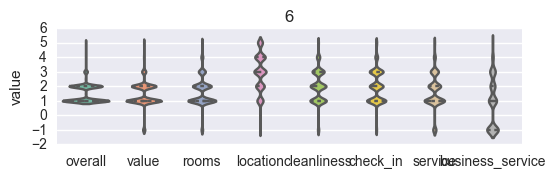

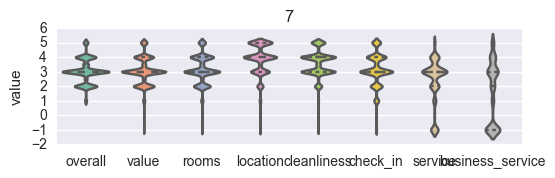

In [14]:
m_agg = pd.melt(agg, id_vars=['author','cluster'],value_vars=['overall','value','rooms','location','cleanliness','check_in','service','business_service'])

x = sorted(list(agg['cluster'].unique()))
#y = list(SubGoal_Max['Target'].unique())
#y = sorted([int(z) for z in y])

for i in x:
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6,1.5))
    sns.violinplot(ax = ax, y = 'value' , x = 'variable', palette = 'Set2', 
                data = m_agg[(m_agg['cluster'] == i)], size = 5, edgecolor = 'w', inner = 'quartile')
    plt.title(i)
    plt.xlabel('')

**Hotel Metrics**

In [15]:
hotel = pd.pivot_table(data, values=['overall','value','rooms','location','cleanliness','check_in','service','business_service'], index='url', aggfunc=np.mean)

In [16]:
hotel = hotel.fillna(-1)
hotel = hotel.reset_index()
hotel.head()

,url,business_service,check_in,cleanliness,location,overall,rooms,service,value
0,http://www.tripadvisor.com/ShowUserReviews-g10...,3.346591,3.166667,3.959494,3.472868,3.073585,4.102757,3.246851,2.994898
1,http://www.tripadvisor.com/ShowUserReviews-g10...,3.818182,4.380000,4.506173,4.460000,4.229167,4.111111,4.271605,3.987805
2,http://www.tripadvisor.com/ShowUserReviews-g10...,3.750000,4.400000,5.000000,4.800000,4.680000,4.857143,4.571429,4.050000
3,http://www.tripadvisor.com/ShowUserReviews-g10...,4.431818,4.588235,4.728814,4.745098,4.416667,4.254237,4.603448,3.982456
4,http://www.tripadvisor.com/ShowUserReviews-g10...,4.333333,4.533333,4.272727,4.800000,4.068182,3.818182,4.500000,4.176471


In [17]:
X = hotel.ix[:,1:]
kmeans2 = KMeans(n_clusters=10, random_state=0).fit(X)

In [18]:
y = kmeans2.labels_

hotel['cluster'] = y

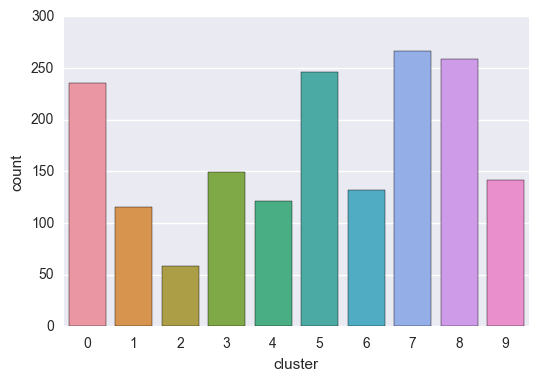

In [19]:
sns.countplot(x="cluster", data=hotel)

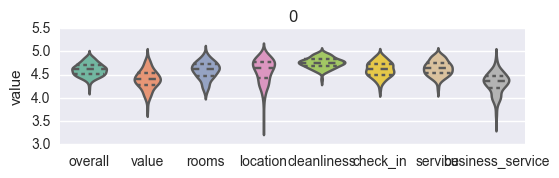

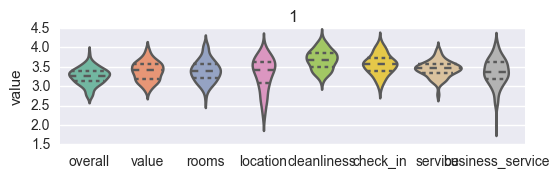

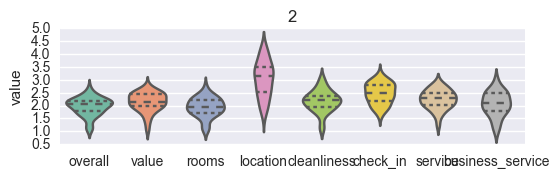

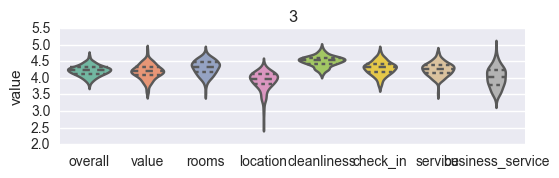

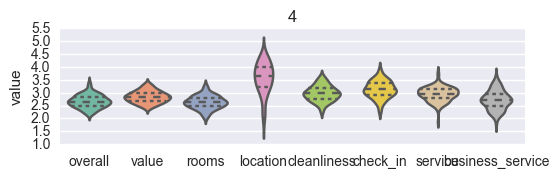

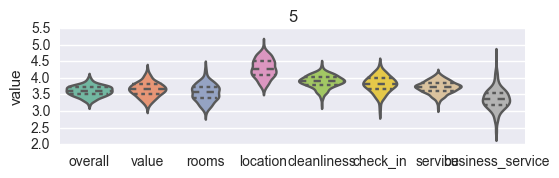

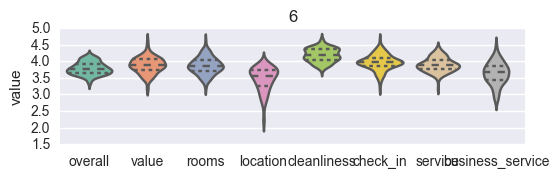

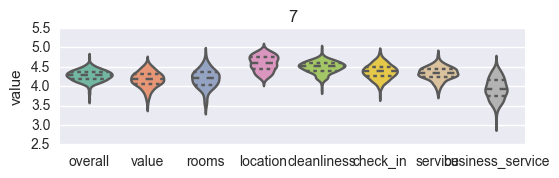

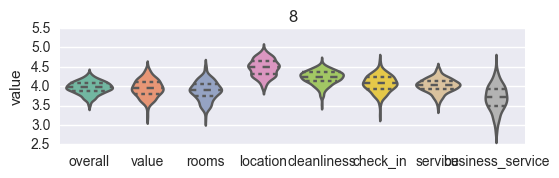

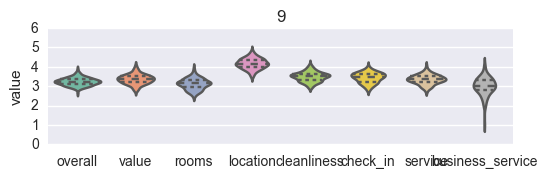

In [20]:
m_hotel = pd.melt(hotel, id_vars=['url','cluster'],value_vars=['overall','value','rooms','location','cleanliness','check_in','service','business_service'])

x = sorted(list(hotel['cluster'].unique()))
#y = list(SubGoal_Max['Target'].unique())
#y = sorted([int(z) for z in y])

for i in x:
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6,1.5))
    sns.violinplot(ax = ax, y = 'value' , x = 'variable', palette = 'Set2', 
                data = m_hotel[(m_hotel['cluster'] == i)], size = 5, edgecolor = 'w', inner = 'quartile')
    plt.title(i)
    plt.xlabel('')

In [21]:
hotel.head()

,url,business_service,check_in,cleanliness,location,overall,rooms,service,value,cluster
0,http://www.tripadvisor.com/ShowUserReviews-g10...,3.346591,3.166667,3.959494,3.472868,3.073585,4.102757,3.246851,2.994898,1
1,http://www.tripadvisor.com/ShowUserReviews-g10...,3.818182,4.380000,4.506173,4.460000,4.229167,4.111111,4.271605,3.987805,7
2,http://www.tripadvisor.com/ShowUserReviews-g10...,3.750000,4.400000,5.000000,4.800000,4.680000,4.857143,4.571429,4.050000,0
3,http://www.tripadvisor.com/ShowUserReviews-g10...,4.431818,4.588235,4.728814,4.745098,4.416667,4.254237,4.603448,3.982456,0
4,http://www.tripadvisor.com/ShowUserReviews-g10...,4.333333,4.533333,4.272727,4.800000,4.068182,3.818182,4.500000,4.176471,7


In [22]:
cust_ct = pd.pivot_table(data, values=['overall'], index=['author'], aggfunc='count')
cust_ct.head()

,overall
author,
!!,2
!!!!!!?,1
!_1234,1
#NAME?,3
$savemoney$,1


In [23]:
data_cl = pd.merge(data, hotel[['url','cluster']], how = 'left',left_on = 'url',right_on = 'url')
data_cl.head()

,author,content,date,no_reader,no_helpful,overall,value,rooms,location,cleanliness,check_in,service,business_service,url,overall_rating,avg_price,cluster
0,selizabethm,Wonderful time- even with the snow! What a gre...,12/23/2008,NaN,NaN,5,4.0,5.0,5.0,5.0,5.0,5.0,NaN,http://www.tripadvisor.com/ShowUserReviews-g60...,4.0,$302,7
1,IndieLady,"Lovely hotel, unique decor, friendly front des...",11/13/2008,NaN,NaN,4,5.0,4.0,5.0,4.0,5.0,5.0,NaN,http://www.tripadvisor.com/ShowUserReviews-g60...,4.0,$302,7
2,Hilobb,"Nice hotel, expensive parking We got a good de...",11/11/2008,NaN,NaN,4,4.0,4.0,3.0,4.0,5.0,NaN,4.0,http://www.tripadvisor.com/ShowUserReviews-g60...,4.0,$302,7
3,Chianti_girl24,Fabulous hotel Location and service are great....,11/4/2008,NaN,NaN,5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,http://www.tripadvisor.com/ShowUserReviews-g60...,4.0,$302,7
4,hothearted,"Loved the Monaco! Staff was amazing, with a sm...",10/18/2008,2.0,2.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.tripadvisor.com/ShowUserReviews-g60...,4.0,$302,7


In [24]:
cust_cl = pd.pivot_table(data_cl, values=['overall'], index=['author'],columns = 'cluster', aggfunc=np.mean)
cust_cl.head(5)

overall                                        
cluster           0   1   2    3   4    5   6    7    8   9
author                                                     
!!              5.0 NaN NaN  NaN NaN  NaN NaN  5.0  NaN NaN
!!!!!!?         NaN NaN NaN  4.0 NaN  NaN NaN  NaN  NaN NaN
!_1234          NaN NaN NaN  NaN NaN  2.0 NaN  NaN  NaN NaN
#NAME?          5.0 NaN NaN  NaN NaN  4.0 NaN  5.0  NaN NaN
$savemoney$     NaN NaN NaN  NaN NaN  NaN NaN  NaN  4.0 NaN

In [25]:
cust_cl.dropna(thresh=7)

overall                                          \
cluster                      0         1         2         3         4   
author                                                                   
1bob                  5.000000  4.500000       NaN  4.000000  3.000000   
??????                4.571429  4.000000       NaN  4.800000  3.000000   
?????????             4.571429       NaN       NaN  4.166667       NaN   
A TripAdvisor Member  4.553485  3.126539  2.153471  4.206516  2.680631   
Boeing767             4.000000       NaN       NaN  4.000000       NaN   
Jerri_Blank                NaN  2.500000       NaN  4.000000       NaN   
Nicolas_from_Paris    5.000000  3.500000       NaN  5.000000       NaN   
msmegmog                   NaN  3.500000       NaN  4.000000  2.000000   
roadwarrior30              NaN  3.000000       NaN  4.000000  4.000000   
travelgrrlnyc         5.000000  2.000000       NaN  5.000000       NaN   
trevostar             5.000000  3.000000       NaN  5.000000  2.000000   
wise2374              5.000000  3.000000       NaN       NaN  3.000000   

                                                                        
cluster                      5         6         7         8         9  
author                                                                  
1bob                  2.000000       NaN       NaN  3.000000  5.000000  
??????                3.909091  4.000000  4.263158  4.181818  3.666667  
?????????             3.750000  2.500000  4.600000  3.800000  4.000000  
A TripAdvisor Member  3.604528  3.802761  4.200520  3.899314  3.291285  
Boeing767             4.500000  4.000000  4.000000  3.500000  4.000000  
Jerri_Blank           4.500000  3.666667  3.000000  4.000000  1.000000  
Nicolas_from_Paris    3.000000  4.000000  5.000000  4.250000  2.500000  
msmegmog              5.000000       NaN  5.000000  4.000000  3.000000  
roadwarrior30         2.000000       NaN  4.000000  4.333333  3.000000  
travelgrrlnyc         3.750000  4.000000  4.500000  4.000000       NaN  
trevostar             4.000000  3.500000  4.000000  4.500000  1.500000  
wise2374              3.333333  4.000000  3.500000  3.500000  3.000000

**Review Content**

In [26]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time

stop = stopwords.words('english')
porter = nltk.PorterStemmer()

C:\Users\Travis Park\Anaconda3_1\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [27]:
content = data[['author','content']]
len(content)

202569

In [28]:
count_rev = pd.DataFrame(pd.pivot_table(data, values = 'content', index='author', aggfunc='count'))
count_rev.sort(columns = 'content', ascending = False)
count_rev = count_rev[count_rev['content'] > 1]
count_rev.reset_index(inplace = True)
count_rev.head(1)

C:\Users\Travis Park\Anaconda3_1\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,author,content
0,!!,2


In [29]:
content['TrimContent'] = ''
trimtext = []
count = len(content)
#155
x=0
st = time.time()
while x < count:#len(content):
    y = content['content'][x].lower().replace('-',' ').split(' ')
    y = [z for z in y if z.isalpha() if z not in stop]
    y = ' '.join([porter.stem(z) for z in y])
    trimtext.append(y)
    x=x+1

et = time.time()

t = et - st
print(t*(len(content)/count))
print(t)
content['TrimContent'][:count] = trimtext

C:\Users\Travis Park\Anaconda3_1\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


173.75403952598572
173.75403952598572


C:\Users\Travis Park\Anaconda3_1\lib\site-packages\pandas\core\series.py:749: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_with(key, value)
C:\Users\Travis Park\Anaconda3_1\lib\site-packages\IPython\core\interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [30]:
content = content[content['author'] != 'A TripAdvisor Member']
t_content = pd.merge(content, count_rev, how = 'inner', left_on = 'author', right_on = 'author')
t_content.head(1)

,author,content_x,TrimContent,content_y
0,IndieLady,"Lovely hotel, unique decor, friendly front des...",love uniqu friendli front desk central locat r...,3


In [31]:
join_review = pd.DataFrame(columns = ['author','text'])

In [32]:
authors = list(t_content['author'].unique())

reviews = []
s = time.time()
for i in authors:
    temp = t_content[t_content['author'] == i]
    r = list(temp['TrimContent'])
    r = ' '.join(r)
    reviews.append(r)
    #print(i)

s = time.time() - s   

In [33]:
len(reviews), len(authors)

(18920, 18920)

In [34]:
join_review['author'] = authors
join_review['text'] = reviews

In [35]:
value = ['cheap','expensive','worth','value', 'rate','price','standar','internet','']
rooms = ['room','messy','clean','bed','wifi','wi-fi','smoke','noise','quiet','hot','conditioner','ac','ugly','beautiful','pretty']
location = ['location','close','safe','downtown','far','walk','restaurant','walk','station','metro','restaurant','downtown','close','airport','train','near','center','min']
cleanliness = ['clean','messy','dirty','filthy','dusty','beautiful','spotless']
check_in = ['smooth','easy','hard','reservation','concierge','check','front','desk','lobby','quick','fast']
service = ['service','housekeeping','helpful','slow','quick','member','breakfast']
business_service = ['desk','business','service','printer','computer','conference']

In [36]:
value = ' '.join([porter.stem(z) for z in value])
rooms = ' '.join([porter.stem(z) for z in rooms])
location = ' '.join([porter.stem(z) for z in location])
cleanliness = ' '.join([porter.stem(z) for z in cleanliness])
check_in = ' '.join([porter.stem(z) for z in check_in])
service = ' '.join([porter.stem(z) for z in service])
business_service = ' '.join([porter.stem(z) for z in business_service])

topics = [value,rooms,location,cleanliness,check_in,service,business_service]

In [37]:
tfidfvectorizer = TfidfVectorizer(ngram_range = (1,1),sublinear_tf=False, min_df = 0.01, max_features = 1100) 

documents = list(join_review['text'])#+ value + rooms + location + cleanliness + check_in + service + business_service

for i in topics:
    documents.append(i)

x = tfidfvectorizer.fit_transform(documents)
l = x.shape[0]
y = pd.DataFrame((x * x.T).A)
y = y.ix[:len(y)-8,len(y.columns)-7:]
y.columns = ['value','rooms','location','cleanliness','check_in','service','business_service']
x1 = pd.DataFrame(x.toarray(),columns = [tfidfvectorizer.get_feature_names()])

#x2 = x.toarray()

#x2 = x2[:l-7]
#x3 = x[l-7:].T

#x4 = (x2*x3)

In [38]:
len(y)

18920

In [39]:
y['author'] = authors

In [40]:
m_y = pd.melt(y, "author", var_name="topic")
m_y = m_y[m_y['value'] > 0]
mm_y = pd.DataFrame(pd.pivot_table(m_y, values = 'value', index='author', aggfunc='max'))
mm_y.reset_index(inplace = True)

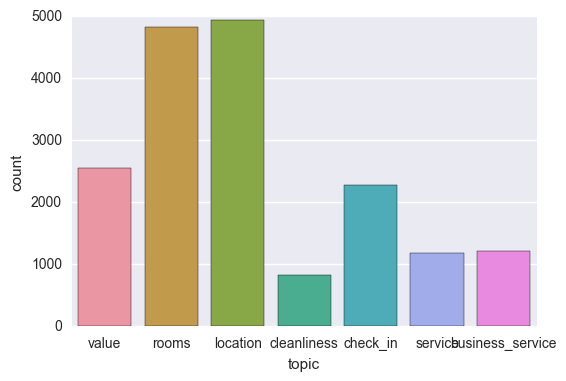

In [41]:
y_max = pd.merge(m_y, mm_y, how = 'inner', left_on = ['author','value'],right_on = ['author','value'])
sns.countplot(y_max['topic']);

In [42]:
data2 = pd.merge(data, y_max[['author','topic']], how = 'inner', left_on = 'author',right_on = 'author')

In [43]:
sent = SentimentIntensityAnalyzer()

In [44]:
indreviews = list(data2['content'])
sentiment = []

for i in indreviews:
    s = sent.polarity_scores(i)
    sentiment.append(s['compound'])

In [45]:
savesent = sentiment

In [46]:
len(data2),len(sentiment)

(44215, 44215)

In [47]:
data2['review_sentiment'] = sentiment

In [48]:
data2.head()

,author,content,date,no_reader,no_helpful,overall,value,rooms,location,cleanliness,check_in,service,business_service,url,overall_rating,avg_price,topic,review_sentiment
0,IndieLady,"Lovely hotel, unique decor, friendly front des...",11/13/2008,NaN,NaN,4,5.0,4.0,5.0,4.0,5.0,5.0,NaN,http://www.tripadvisor.com/ShowUserReviews-g60...,4.0,$302,check_in,0.9967
1,IndieLady,"Dirty, old, noisy, disgusting! I was ready to ...",9/16/2008,NaN,NaN,1,NaN,1.0,4.0,1.0,3.0,2.0,NaN,http://www.tripadvisor.com/ShowUserReviews-g29...,2.0,$142,check_in,-0.9220
2,IndieLady,"Charming, quaint hotel in central SF location ...",11/13/2008,NaN,NaN,4,3.0,3.0,4.0,3.0,4.0,4.0,NaN,http://www.tripadvisor.com/ShowUserReviews-g60...,4.0,$212,check_in,0.9686
3,Chianti_girl24,Fabulous hotel Location and service are great....,11/4/2008,NaN,NaN,5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,http://www.tripadvisor.com/ShowUserReviews-g60...,4.0,$302,check_in,0.9168
4,Chianti_girl24,Super location We stayed here our last night i...,4/5/2008,1.0,1.0,5,NaN,5.0,5.0,5.0,5.0,5.0,3.0,http://www.tripadvisor.com/ShowUserReviews-g25...,4.0,$250,check_in,0.9708


In [49]:
data2.to_csv('C:\\Users\\Travis Park\\Google Drive\\Spring 2017\\Text Analytics\\Project\\Text Anlytics Project\\topics.csv')

In [50]:
rel_score = pd.DataFrame(columns = ['url'])
rel_score['url'] = list(data2['url'].unique())

In [51]:
tpc_df = data2[['url','rooms']][data2['topic'] == 'rooms']
pvt = pd.pivot_table(tpc_df, values=['rooms'], index=['url'], aggfunc=np.mean)
pvt.reset_index(inplace = True)
rel_score = pd.merge(rel_score, pvt, how = 'left',left_on = 'url',right_on = 'url')

tpc_df = data2[['url','location']][data2['topic'] == 'location']
pvt = pd.pivot_table(tpc_df, values=['location'], index=['url'], aggfunc=np.mean)
pvt.reset_index(inplace = True)
rel_score = pd.merge(rel_score, pvt, how = 'left',left_on = 'url',right_on = 'url')

tpc_df = data2[['url','check_in']][data2['topic'] == 'check_in']
pvt = pd.pivot_table(tpc_df, values=['check_in'], index=['url'], aggfunc=np.mean)
pvt.reset_index(inplace = True)
rel_score = pd.merge(rel_score, pvt, how = 'left',left_on = 'url',right_on = 'url')

tpc_df = data2[['url','cleanliness']][data2['topic'] == 'cleanliness']
pvt = pd.pivot_table(tpc_df, values=['cleanliness'], index=['url'], aggfunc=np.mean)
pvt.reset_index(inplace = True)
rel_score = pd.merge(rel_score, pvt, how = 'left',left_on = 'url',right_on = 'url')

tpc_df = data2[['url','service']][data2['topic'] == 'service']
pvt = pd.pivot_table(tpc_df, values=['service'], index=['url'], aggfunc=np.mean)
pvt.reset_index(inplace = True)
rel_score = pd.merge(rel_score, pvt, how = 'left',left_on = 'url',right_on = 'url')

tpc_df = data2[['url','business_service']][data2['topic'] == 'business_service']
pvt = pd.pivot_table(tpc_df, values=['business_service'], index=['url'], aggfunc=np.mean)
pvt.reset_index(inplace = True)
rel_score = pd.merge(rel_score, pvt, how = 'left',left_on = 'url',right_on = 'url')

tpc_df = data2[['url','value']][data2['topic'] == 'value']
pvt = pd.pivot_table(tpc_df, values=['value'], index=['url'], aggfunc=np.mean)
pvt.reset_index(inplace = True)
rel_score = pd.merge(rel_score, pvt, how = 'left',left_on = 'url',right_on = 'url')

In [52]:
rel_score.to_csv('C:\\Users\\Travis Park\\Google Drive\\Spring 2017\\Text Analytics\\Project\\Text Anlytics Project\\rel_score.csv')

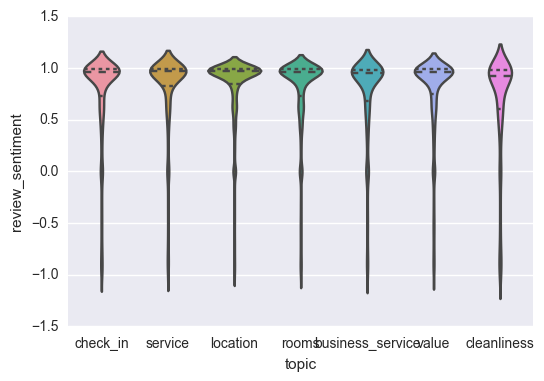

In [53]:
sns.violinplot(data = data2, x = 'topic',y = 'review_sentiment', inner = 'quartile');

In [54]:
#sns.swarmplot(y="review_sentiment", hue="topic", data=data2)

C:\Users\Travis Park\Anaconda3_1\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


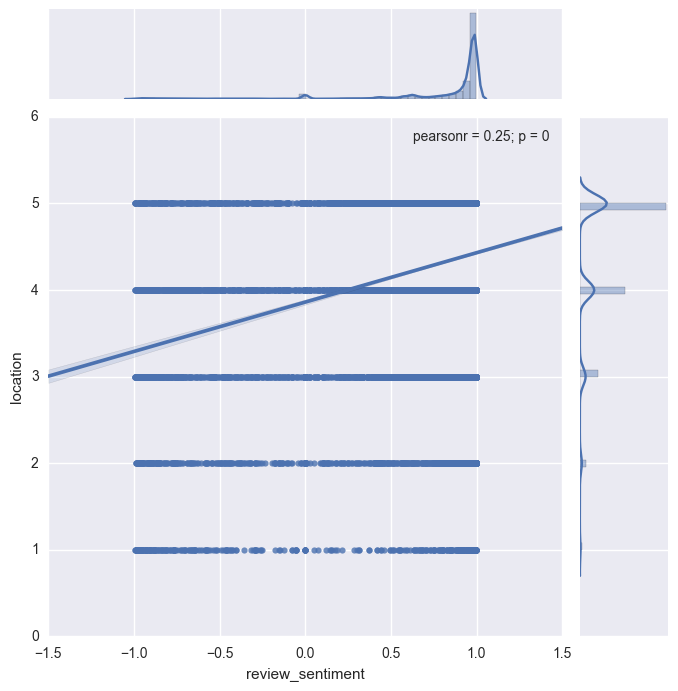

In [55]:
sns.jointplot(x = 'review_sentiment',y = 'location', data = data2, kind="reg", size=7);

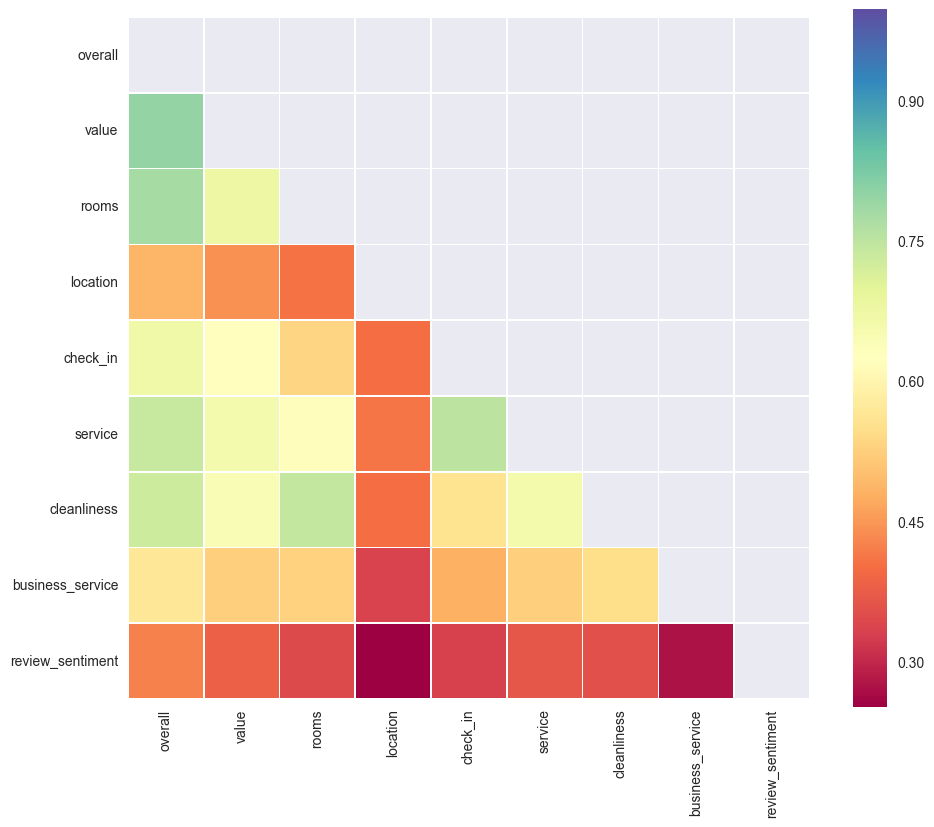

In [56]:
temp = data2[['overall','value','rooms','location','check_in','service','cleanliness','business_service','review_sentiment']]
corr = temp.corr()
fg, ax = plt.subplots(figsize = (11,9))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

p = sns.heatmap(corr, mask = mask, linewidths = .5, square = True, cmap = 'Spectral');

In [57]:
m_temp = pd.melt(data2[['topic','author','overall','value','rooms','location','check_in','service','cleanliness','business_service','review_sentiment']], 
                 ["author",'topic'], var_name="slice")

In [58]:
m_temp.head()

,author,topic,slice,value
0,IndieLady,check_in,overall,4.0
1,IndieLady,check_in,overall,1.0
2,IndieLady,check_in,overall,4.0
3,Chianti_girl24,check_in,overall,5.0
4,Chianti_girl24,check_in,overall,5.0


**Individual Investigation**

In [59]:
temp = data2[data2['url'].str.contains('Nusa')]

In [60]:
temp.reset_index(inplace = True)

In [61]:
temp.head()

,index,author,content,date,no_reader,no_helpful,overall,value,rooms,location,cleanliness,check_in,service,business_service,url,overall_rating,avg_price,topic,review_sentiment
0,788,Crosby1,Kick Back and Relax Your Days Away My wife and...,10/2/2005,13.0,12.0,5,5.0,5.0,NaN,5.0,NaN,5.0,NaN,http://www.tripadvisor.com/ShowUserReviews-g29...,4.5,$442,location,0.9994
1,1067,bazzeref,Excellence in Bali Spent 12 nights at this hot...,4/20/2007,9.0,9.0,5,5.0,4.0,5.0,5.0,5.0,5.0,4.0,http://www.tripadvisor.com/ShowUserReviews-g11...,4.0,$202,value,0.9836
2,1239,Danify,5 Days of Pure Luxury! 5 days of pure Luxury!!...,10/10/2008,NaN,NaN,5,5.0,4.0,5.0,5.0,5.0,5.0,NaN,http://www.tripadvisor.com/ShowUserReviews-g29...,4.5,$231,rooms,0.9904
3,1733,Nick_From_Manchester,Amongst the best The church in the Conra...,11/7/2008,6.0,5.0,5,5.0,5.0,4.0,5.0,5.0,5.0,5.0,http://www.tripadvisor.com/ShowUserReviews-g11...,4.5,$249,value,0.6369
4,1935,Happytrip8,Fantastic hotel in a great country view ...,10/18/2008,4.0,4.0,5,4.0,4.0,5.0,5.0,4.0,4.0,NaN,http://www.tripadvisor.com/ShowUserReviews-g29...,4.0,$233,business_service,0.8271


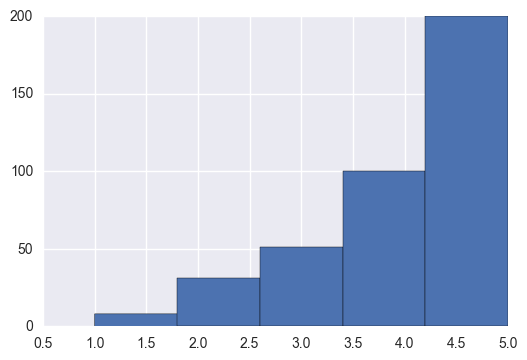

In [82]:
temp['check_in'].hist(bins = 5)

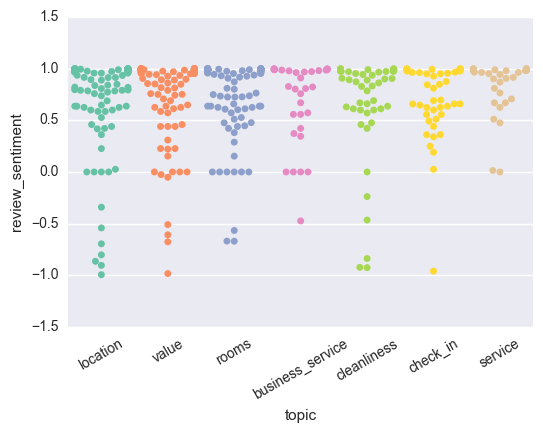

In [63]:
p = sns.swarmplot(y="review_sentiment", x="topic", data=temp, palette = 'Set2')
p.set_xticklabels(rotation = 30, labels = ['location','value','rooms','business_service','cleanliness','check_in','service']);

pf = p.get_figure()
pf.savefig("swarm.png", dpi = 900)

In [64]:
m_temp = pd.melt(data2[['topic','overall','value','rooms','location','check_in','service','cleanliness','business_service']], 
                 ['topic'], var_name="slice")

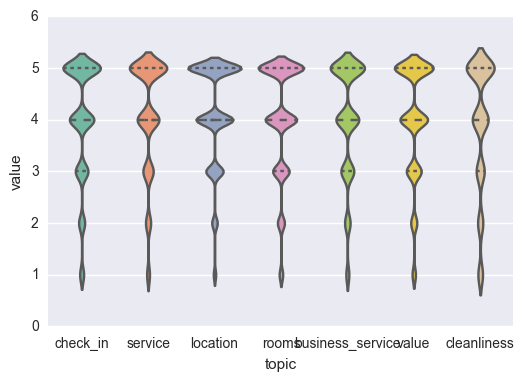

In [65]:
sns.violinplot(y="value", x="topic", data=m_temp, palette = 'Set2', inner = 'quartile')

In [66]:
from wordcloud import WordCloud, STOPWORDS

In [92]:
text = ' '.join(list(temp['content'][temp['review_sentiment'] < 0]))

stopwords = set(STOPWORDS)
stopwords.add('really')
stopwords.add('hotel')
stopwords.add('Bali')

AttributeError: module 'matplotlib.cm' has no attribute 'grey'

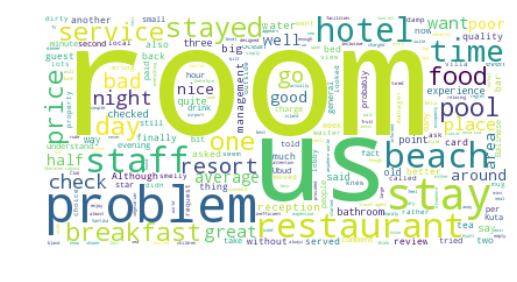

In [93]:
wc = WordCloud(background_color="white", max_words=2000, stopwords=stopwords)
wc.generate(text)

p = plt.imshow(wc, interpolation='bilinear')
wc.to_file( "wc-.png")
plt.axis("off")
plt.figure()
plt.imshow(cmap=plt.cm.grey, interpolation='bilinear')
plt.axis("off")
plt.show();